***myself ADITYA JHA, i build a Classification Model,which tells us whether a person have heart disease or not,
in this project i use PANDAS for importing the file & doing EDA, SWEETVIZ library to select the best features which are 
contributing to label column, KFold cross validation for split our data into training & testing part and finally developed the ML model & made a Classification system.***


## importing required libraries:-

In [113]:
%%time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import sweetviz as sv

Wall time: 250 ms


### importing file

In [11]:
data=pd.read_csv('c:/new/heart.csv')

In [12]:
data.tail(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### check the null values, and fill it by mean

In [14]:
data.isnull().sum()
data['fbs']=data['fbs'].fillna(data['fbs'].mean())

In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
data['target'].value_counts()  # check whether our data have sampling problem or not

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

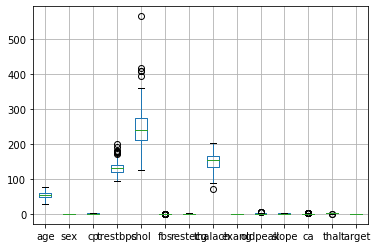

In [18]:
data.boxplot()

## use SWEETVIZ library for Features selection:-

In [114]:
report=sv.analyze(data)
report.show_html('report.html') 


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### drop the column 'fbs', which are not contributing anything

In [117]:
data.drop(['fbs'],axis=1,inplace=True)

### separate our data into features & label

In [118]:
x=data.iloc[:,0:-1].values
y=data.iloc[:,-1:].values

## apply KFold for better accuracy:-

In [125]:
score=0
kf=KFold(n_splits=10,shuffle=True)                          # kfold cross validation
for trainindex,testindex in kf.split(x):
    xtrain,ytrain=x[trainindex],y[trainindex]
    xtest,ytest=x[testindex],y[testindex]
    
    robo=LogisticRegression()
    robo.fit(xtrain,ytrain)
    pred=robo.predict(xtest)
    print(accuracy_score(ytest,pred))
    if (accuracy_score(ytest,pred) > score):
        score=(accuracy_score(ytest,pred))
        xtr,ytr,xts,yts=xtrain,ytrain,xtest,ytest        # fetch the training & test set, which have better accuracy
print('max####---',score)

C:\Users\aditya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aditya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.9032258064516129
0.8064516129032258
0.7419354838709677
0.7333333333333333
0.9
0.7666666666666667
0.9666666666666667
0.8
0.8333333333333334
0.9333333333333333
max####--- 0.9666666666666667


C:\Users\aditya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model building by LOgistic Reg-

In [126]:
robo1=LogisticRegression()
robo1.fit(xtr,ytr)

C:\Users\aditya\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
pred=robo1.predict(xts)
accuracy_score(yts,pred)      

0.9666666666666667

## buiding a predictive system   :-

In [128]:
inp=(int(input('age:')),int(input('sex male-0,female-1:')),int(input('cp:')),int(input('threstbp')),
     int(input('chol:')),int(input('restecg')),
    int(input('thalach')),int(input('exang')),int(input('oldpeak:')),
     int(input('slope:')),int(input('ca:')),int(input('thal:')))

age:55
sex male-0,female-1:0
cp:1
threstbp130
chol:233
restecg0
thalach155
exang0
oldpeak:0
slope:1
ca:1
thal:2


In [129]:
inp

(55, 0, 1, 130, 233, 0, 155, 0, 0, 1, 1, 2)

In [131]:
inparr=np.array(inp,dtype=int)
inparr=inparr.reshape(1,-1)
inparr

array([[ 55,   0,   1, 130, 233,   0, 155,   0,   0,   1,   1,   2]])

In [132]:
if robo.predict(inparr)==1:
    print('this person have heart disease')
else:
    print('this person have heart disease')

this person have heart disease
